# AMIA 2016 Annual Symposium Workshop (WG13)

### Mining Large-scale Cancer Genomics Data Using Cloud-based Bioinformatics Approaches (RNAseq)

Riyue Bao, Ph.D. 
Center for Research Informatics,
The University of Chicago.
8:45 AM - 10:00 AM, November 13, 2016

***

## Table of Contents: <a class="anchor" id="top"></a>
* [Objective](#01)
* [Dataset](#02)
* [1. RNAseq technology, clinical application and data analysis](#03)
	* [1.2 What is RNAseq and when to use it](#03.1)
    * [1.3 Challenges and limitations](#03.2)
* [2. How to perform RNAseq analysis](#04)
	* [Workflow](#04.1)
	* [2.1 - 2.2 Quality assessment and preprocessing of raw sequencing reads](#04.2)
	* [2.3 - 2.4 Map reads to reference genome and quantification of transcript abundance](#04.3)
	* [2.5 - 2.7 Normalize gene expression and identify DEGs: DESeq2](#04.4)
	* [2.8 Identify enriched GO and pathways: clusterProfiler](#04.5)
* [3. Practice how to associate gene expression with clincial data](#05)
	* [Workflow](#05.1)
	* [3.1 - 3.2. Import data, normalize expression and cluster patients based on expression profile](#05.2)
	* [3.3 Survival analysis](#05.3)
* [Summary](#06)
* [Run pipeline (after the workshop)](#07)

***

## Objective<a class="anchor" id="01"></a> <small>[[top](#top)]</small>

* **Introduction to RNAseq technology and clinical application** (10 minutes)
    * Learn the background and when to use RNAseq for your projects
* **How to perform RNAseq analysis** (50 minutes) *hands-on*
    * Learn the good-practice analysis protocol (**8 steps**)
        * From raw sequencing data to quantitative measures of transcripts (automated pipeline)
        * Identify differentially expressed genes (DEGs) between conditions and affected pathways (R & Bioconductor)
        * Generate high-quality figures for publication
* **Associate gene expression data with clincial outcome** (15 minutes) *hands-on*
    * Discover tumor subtypes and detect survival difference (**3 steps**) (R & Bioconductor)

<img src='notebook_ext/ipynb_data/assets/Figure24.png', title = 'RNAseq objective', width = 600, height = 600>

***

## Dataset<a class="anchor" id="02"></a> <small>[[top](#top)]</small>
* **Data for RNAseq analysis**
    * Two groups (*PRDM11* KO vs WT, human U2932 cells), 6 samples [1]
    * Aim to identify DEGs / pathways altered between KO and WT groups

| Sample | Group | Sequencing File | Sequencing Data |
|------|------|------|------|------|   
| KO01 | KO | KO01.fastq.gz | 74,126,025 reads |   
| KO02 | KO | KO02.fastq.gz | 64,695,948 reads |   
| KO03 | KO | KO03.fastq.gz | 52,972,573 reads |   
| WT01 | WT | WT01.fastq.gz | 55,005,729 reads |   
| WT01 | WT | WT02.fastq.gz | 61,079,377 reads |   
| WT01 | WT | WT03.fastq.gz | 66,517,156 reads |  

* **Data for clinical association**
    * The Cancer Genome Atlas (TCGA) ovarian cancer, 379 primary tumors **[Genomics Data Commons](https://gdc-portal.nci.nih.gov)** [2]
    * Aim to use gene expression to group patients into subtypes and detect survival differences
    * **TCGA datasets** (35 cancer types, > 20,000 tumor/normal samples, > 9,000 patients)
<img src='notebook_ext/ipynb_data/assets/Figure23.2.png', title = 'GDC', width = 600, height = 600>

***

## 1. RNAseq technology, clinical application and data analysis<a class="anchor" id="03"></a> <small>[[top](#top)]</small>

### Biological and clinical questions

* I am interested in studying transcriptional landscape shift before and after drug treatment in cell lines
* I want to identify which pathways are affected after knocking down my favorite gene in mice
* I have expression data of clinical isolates collected at various time points, when patient's response changed. Why?
* I have a cohort of patients and want to discover which gene signature predicts patient's response to treatment
* I want to detect gene fusions, expressed mutations, and disrupted isoforms in tumors that may be related to disease

### 1.1. What is RNAseq and when to use it<a class="anchor" id="03.1"></a> <small>[[top](#top)]</small>
<img src='notebook_ext/ipynb_data/assets/Figure14.png', title = 'A typical RNAseq experiment', width = 800, height = 400>
* **High-throughput sequencing of RNA: Profile, identify or assemble transcripts**
    * **Detect gene expression changes between conditions**
    * Identify novel splice sites / exons, mutations, fusion genes, etc.
    * Broad detection range (lowly to highly expressed genes), high sensitivity, low requirement of RNA amount
    * Available for all species (reference genome is optional): reference genome-guided alignment or *de novo* assembly
    * Transcriptome-wide approach for quantitative measurements and gene discovery without prior knowledge
* **Experimental Design** ([considerations and limitations](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq/tree/master/notebook_ext/ipynb_data/assets/Figure13.png))
    * Include biological replicates for increased discovery power
<img src='notebook_ext/ipynb_data/assets/Figure15.2.png', title = 'Biological replicates', width = 400, height = 400>

### 1.2 Challenges and limitations<a class="anchor" id="03.2"></a> <small>[[top](#top)]</small>
* Relatively poor RNA quality for tumor FFPE samples
* Contamination from adjacent normal tissue
* Still more expensive than targeted-panel sequencing such as NanoString
* 40 million mapped reads are usually sufficient for gene profiling, but > 80 millions are required to detect bottom 1% lowly expressed genes [3]

***

## 2. How to perform RNAseq analysis<a class="anchor" id="04"></a> <small>[[top](#top)]</small>

<img src='notebook_ext/ipynb_data/assets/Figure20.2.png', title = 'RNAseq analysis', width = 800, height = 400>

### Workflow 

The best-practice analysis protocol takes 8 major steps. For a more detailed description, refer to the extended version of notebooks (`notebook_ext/02.Run_RNAseq.tutorial.ipynb`).

* Steps 1-4: From raw sequencing to transcript quantification is **automated through [BigDataScript](https://pcingola.github.io/BigDataScript/) (BDS) pipeline**.
* Steps 5-8: DEG and pathway analysis will be practiced **interactively to better interpret the results**.

<img src='notebook_ext/ipynb_data/assets/Figure25.png', title = 'RNAseq workflow', width = 900, height = 900>

Due to time limit, we will not run the BDS pipeline in this workshop. Since it is automated, participants are encouraged to practice it post-workshop following the instructions at [Github](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq). The launching of the pipeline only requires submission of one script `Build_RNAseq.sh`, which was already prepared for you. The pipeline was designed to **take care of all the dependencies between tasks/jobs with robust checkpoints and high reproducibility**. 

### Steps 1-4

***

### 2.3.1 - 2.3.2 Quality assessment and preprocessing of raw sequencing reads<a class="anchor" id="04.2"></a> <small>[[top](#top)]</small>

* **Raw sequencing reads** are stored in FastQ format (e.g. `KO01.fastq.gz`), where each read is presented by 4 lines
<img src='notebook_ext/ipynb_data/assets/Figure10.png', title = 'Sequencing reads in FastQ format', width = 600, height = 90>
* QC produces reports that help you evaluate if a sequencing run is successful and if reads are of high quality ([example](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq/tree/master/notebook_ext/ipynb_data/assets/multiqc_report.html))
* *Optional* Preprocess reads to improve mapping rate and accuracy (in the next step, 1.3.3)
    * Trim low-quality bases, clip adapters, etc.
    * Avoid overtrimming in RNAseq! ([Williams et al. 2016](http://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-016-0956-2))

***
### 2.3.3 - 2.3.4 Map reads to reference genome and quantification of transcript abundance<a class="anchor" id="04.3"></a> <small>[[top](#top)]</small>
* Read mapping identifies the location in the genome where a sequencing read comes from
* Accurate mapping result is the key for quantification and DEG identification
* **splice-aware aligner** (e.g. [STAR](https://github.com/alexdobin/STAR))
<img src='notebook_ext/ipynb_data/assets/Figure12.png', title = 'RNAseq mapping result', width = 600, height = 400>
* **Different aligners may generate very different results** ([Engström et al. 2013](http://www.nature.com/nmeth/journal/v10/n12/full/nmeth.2722.html))

***
### RNAseq metrics
* Collect metrics to evaluate RNA sample quality and identify potential problems ([example](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq/tree/master/notebook_ext/ipynb_data/assets/multiqc_report.html))
    * **Is there high-level genomic DNA contamination?**
    * **Was ribosome RNA sucessfully depleted during library prep?**
    * Is the RNA highly degraded?
    * How do reads distribute on the genome? (exons, introns, intergenic, etc.)
    * Does the target gene knocked down in KO samples have reduced expression as expected?   

*For detailed answers to those questions, refer to the extended version of notebooks* (`notebook_ext/02.Run_RNAseq.tutorial.ipynb`)

<blockquote>
Q1: Which sample (S1-4) has the most severe contamination from genomic DNA?   
Hint: higher percentage of intergenic reads indicates more severe DNA contamination in RNA samples
</blockquote>
<blockquote>
Q2: Which sample (S1-4) has the least efficient depletion of ribosome RNAs (rRNAs)?   
Hint: rRNAs account for > 80% of the whole transcriptome. If not removed, the majority of the sequencing reads will be derived from rRNA and not the coding or lincRNAs.
</blockquote>
<img src='notebook_ext/ipynb_data/assets/Figure5.png', title = 'Figure5', width = 600, height = 600>

### Steps 5-8

* From the pipeline run, we generated read alignment and counts for every annotated gene on the genome
* The next step is to utilize the read counts data to detect DEGs
* For example, if we visualize *FOS* gene across 6 samples in genome browser (e.g. [IGV](http://software.broadinstitute.org/software/igv/))

<img src='notebook_ext/ipynb_data/assets/Figure16.png', title = 'KO vs WT read coverage FOS', width = 600, height = 600>

## Hands-on practice START

* **Due to time constraints, and to facialiate workshop demo, small R script snippets were prepared to simplify steps described in hands-on**
* Those scripts can be found in directory `notebook_ext/ipynb_data/Rscripts`, e.g. `DESeq2.plot_PCA.R`
* Contents of those snippets will not show in this notebook but comments were added to describe their functions 

***
### 2.3.5 - 2.3.7 Normalize gene expression and identify DEGs: DESeq2<a class="anchor" id="04.4"></a> <small>[[top](#top)]</small>

Involves five sub-steps in [R](https://www.r-project.org/about.html) (i to v).

**To systematically identify significant DEGs across the transcriptome, we will use [DESeq2](http://bioconductor.org/packages/release/bioc/html/DESeq2.html)**
* Different tools (`edgeR`, `limmavoom`) may have very different performance! [Seyednasrollah F et al. 2015](https://dx.doi.org/10.1093/bib/bbt086)
* We will also practice how to generate publication-quality figures such as PCA, heatmap, clustering, and pathways from our data

**Good coding practice**
* One statement each line for clarity. It is possible to concatenate statements with `;` but not recommended
* Break long statements into multiple lines with less than 80 column per line for better readability!

***
### i. Prepare working environment and set up parameters
* Set up global variables at the beginning, avoid hard-coding of file names, directories, etc.
* Can easily apply to other projects with similar experimental design

In [1]:
##-- Clean the environment: always run this before starting new analysis!
rm(list=ls())

##-- Load libraries required in this analysis
##-- Those packages were pre-installed in the AWS machine
pkg.list = c('ggplot2', 'RColorBrewer', 'reshape', 'broom',
             'DESeq2', 'vsn', 'genefilter', 'pheatmap',
             'clusterProfiler', 'pathview', 'IRdisplay')
for(pkg in pkg.list) {
    suppressMessages(library(pkg, character.only = TRUE))
}

##-- Parameters
cancer = 'DLBC' ## full name
fdr = 0.05 ## false-discovery rate adjusted p-value
fc = 1.5 ## expression fold of change
gene.type = 'coding' ## protein-coding genes
caller = 'deseq2'
group1 = 'KO' ## knockout
group2 = 'WT' ## wild-type
colors = c('#CC0000', '#00CC00')

##-- Set up working directory
work.dir = '.'
setwd(work.dir)

##-- Input/Output directories
in.dir = 'notebook_ext/ipynb_data/input'
out.dir = 'notebook_ext/ipynb_data/output'

##-- Input/Output files
expr.file = paste0(cancer, '.raw_counts.coding.tsv')
sample.file = paste0(cancer, '.sample_group.tsv')

##-- Print analysis info
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.print_info.R')
source(script)

[1] "Cancer = DLBC"
[1] "gene type = coding"
[1] "DEG fdr cutoff = 0.05"
[1] "DEG fc cutoff = 1.5"
[1] "Expression file = DLBC.raw_counts.coding.tsv"
[1] "Sample group file  = DLBC.sample_group.tsv"


***
### ii. Import data
* Read counts on coding genes 
* Sample groups

In [2]:
##-- Read data files
data.expr = read.delim(file.path(in.dir, expr.file), header=T, 
                       stringsAsFactors=F)
data.sample = read.delim(file.path(in.dir, sample.file), header=T, 
                         stringsAsFactors=F)

print('Show the first three lines of gene expression file:')
data.expr[1:3,]
print('Show the sample group file:')
data.sample

[1] "Show the first three lines of gene expression file:"


ENSEMBL,SYMBOL,KO01,KO02,KO03,WT01,WT02,WT03
ENSG00000000003.14,TSPAN6,3,1,4,0,0,0
ENSG00000000005.5,TNMD,0,0,0,0,0,0
ENSG00000000419.12,DPM1,3197,2318,1356,2630,2735,2721


[1] "Show the sample group file:"


Sample,Group
KO01,KO
KO02,KO
KO03,KO
WT01,WT
WT02,WT
WT03,WT


***
### iii. Principle Component Analysis (PCA) and biological replicate correlation
* Both are good assessment to identify mislabeled samples and outliers
* All genes are used as input!
* PCA - do samples group as expected? 
* Correlation - do biological replicates correlate with each other? 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

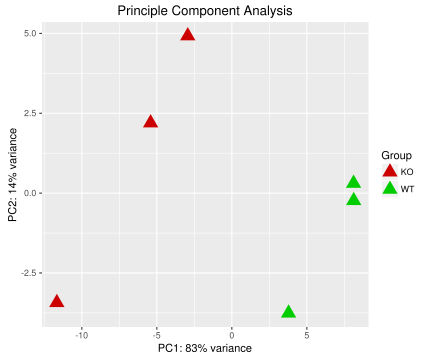

In [3]:
##-- Format data matrix
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.format_data.R')
source(script)

##-- DESeq2: build DESeqDataSet object, prepare design matrix
dds = DESeqDataSetFromMatrix(countData = as.matrix(data.expr.proc),
                             colData = data.sample, 
                             design = ~ Group)
# print(dds)

##-- DESeq2: normalize matrix for clustering/heatmap generation
vsd = varianceStabilizingTransformation(dds, blind=FALSE)

##-- DESeq2: sample correlation heatmap (skip in workshop)
# script = file.path('notebook_ext','ipynb_data','Rscripts',
# 'DESeq2.plot_SMcor_heatmap.R')
#source(script)

##-- DESeq2: Principal component analysis (PCA) plot
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.plot_PCA.R')
source(script)

***
### iv. Normalize and detect DEGs
* Normalize read counts and fit a linear model
* Lowly expressed genes are automatically filtered out (default as mean read counts < 10)
* Estimate the **KO vs WT** fold-change and p-values for each gene 

In [4]:
##-- DESeq2: set up variables
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.set_variable.R')
source(script)

##-- DESeq2: fit the model and identify DEGs
print('Running DESeq2 ... ')
dds = DESeq(dds, test="Wald", betaPrior=T)
res = results(dds, 
              contrast=c("Group",group1,group2), 
              pAdjustMethod ="fdr", 
              alpha=fdr)
print('Done!')

##-- DESeq2: peek into DEG data object
summary(res)
res = as.data.frame(res)

##-- DESeq2: add anti-log2 fold change and gene symbol to output
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.add_fc_symbol.R')
source(script)

print('Show the first three lines of DESeq2 output:')
res.print[1:3,]

[1] "Group 1 = KO"
[1] "Group 2 = WT"
[1] "Running DESeq2 ... "


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


[1] "Done!"

out of 16790 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 1010, 6% 
LFC < 0 (down)   : 1038, 6.2% 
outliers [1]     : 1, 0.006% 
low counts [2]   : 4190, 25% 
(mean count < 10)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "Show the first three lines of DESeq2 output:"


ENSEMBL,SYMBOL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,foldChange
ENSG00000000003.14,TSPAN6,1.449331,0.1551665,0.08359604,1.856147,0.06343258,NA,1.113550
ENSG00000000005.5,TNMD,0.000000,NA,NA,NA,NA,NA,NA
ENSG00000000419.12,DPM1,2427.048731,-0.2017824,0.12436288,-1.622529,0.10469004,0.2767594,-1.150118


***
### v. Filter for significant DEGs and plot heatmap
* Filter for significant DEGs with at least 1.5 fold-change and FDR-adjusted p-value < 0.05
* Generate expression heatmap on significant DEGs (different from PCA and correlation heatmap described in iii)

[1] "Show the first three lines of DESeq2 output:"


ENSEMBL,SYMBOL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,foldChange
ENSG00000000003.14,TSPAN6,1.449331,0.1551665,0.08359604,1.856147,0.06343258,NA,1.113550
ENSG00000000005.5,TNMD,0.000000,NA,NA,NA,NA,NA,NA
ENSG00000000419.12,DPM1,2427.048731,-0.2017824,0.12436288,-1.622529,0.10469004,0.2767594,-1.150118


[1] "Genes removed = 7245 (fold change is NA)"
[1] "Genes kept = 12599"
[1] "Filter DEGs by: fc, 1.5, fdr 0.05"
[1] "Genes non-significant = 12303 (fc, 1.5, fdr 0.05)"
[1] "Genes significant = 296"
[1] "Heatmap = 296 genes on the row, 6 samples on the column"


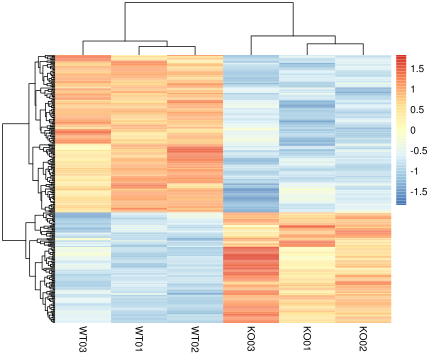

In [5]:
##-- DESeq2: filter significant DEGs by fc 1.5 and adjusted p < 0.05
print('Show the first three lines of DESeq2 output:')
res.print[1:3,]
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.flt_sigDEGs.R')
source(script)

##-- DESeq2: plot sig DEG heatmap
print(paste0('Heatmap = ', nrow(data.plot), ' genes on the row, ', 
             ncol(data.plot), ' samples on the column'))
pheatmap(data.plot,
         scale = 'row',
         cluster_rows = TRUE, cluster_cols = TRUE,
         show_rownames = FALSE, show_colnames = TRUE,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean", 
         clustering_method = "complete",
        )

***
### 2.3.8 Identify enriched GO and pathways: clusterProfiler<a class="anchor" id="04.5"></a> <small>[[top](#top)]</small>
* Gene Ontology bological processes and KEGG pathways
* Enrichment in significant DEGs

'select()' returned 1:many mapping between keys and columns
Warning message in bitr(geneID = genes.all$SYMBOL, fromType = "SYMBOL", toType = c("ENTREZID"), :
“0.9% of input gene IDs are fail to map...”

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue
GO:1902105,GO:1902105,regulation of leukocyte differentiation,17/266,152/10989,1.482200e-07,0.0002654608,0.0002199212
GO:1903706,GO:1903706,regulation of hemopoiesis,20/266,210/10989,1.713203e-07,0.0002654608,0.0002199212
GO:0002761,GO:0002761,regulation of myeloid leukocyte differentiation,11/266,69/10989,7.151402e-07,0.0007387398,0.0006120095


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
hsa05322,hsa05322,Systemic lupus erythematosus,12/140,70/4592,9.399456e-07,0.0001992685,0.0001919468,8347/8343/8339/8970/8358/8357/8356/8367/8365/8349/440689/7124,12
hsa01212,hsa01212,Fatty acid metabolism,7/140,45/4592,3.624430e-04,0.0300220377,0.0289189439,39/23205/79071/3992/9415/51144/6319,7
hsa01040,hsa01040,Biosynthesis of unsaturated fatty acids,5/140,22/4592,4.248402e-04,0.0300220377,0.0289189439,79071/3992/9415/51144/6319,5


'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/ubuntu/dev/rnaseq/CRI-Workshop-Nov2016-RNAseq
Info: Writing image file hsa04010.gene_all.pathview.png


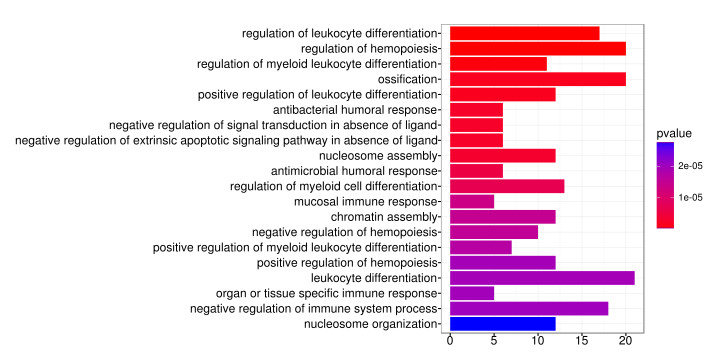

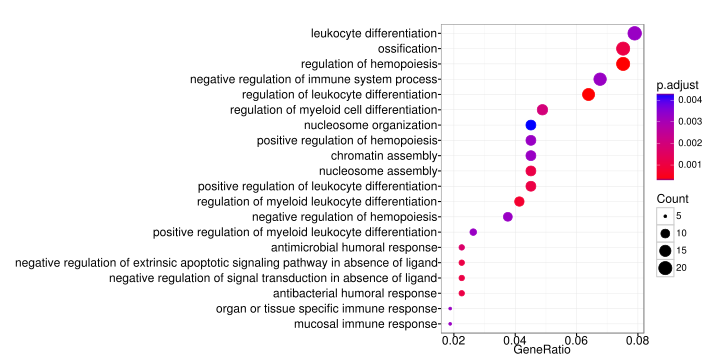

In [6]:
##-- clusterProfiler: NOTE those commands were tested for clusterProfiler 
##-- version 3.0.5 or above. Older versions may not work as they have 
##-- options revised/removed in the new versions.

##-- clusterProfiler: prepare input for GO/KEGG enrichment analysis
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'clusterProfilter.prepare_input.R')
source(script)

##-- clusterProfiler: GO over-representation test
##-- takes ~2 minutes .. skip in workshop!
# ego = enrichGO( gene          = genes.sig.anno$ENTREZID,
#                 universe      = genes.all.anno$ENTREZID,
#                 OrgDb         = 'org.Hs.eg.db',
#                 ont           = "BP",
#                 pAdjustMethod = "fdr",
#                 pvalueCutoff  = 0.05,
#                 readable      = TRUE)
##-- instead, load already generated output
load(paste0(out.prefix, '.flt.fdr', fdr,'_fc',fc, '.enrichGO.RData'))
summary(ego)[1:3,1:7]

##-- clusterProfiler: KEGG over-representation test
##-- takes ~2 minutes .. skip in workshop!
# kk =  enrichKEGG(gene          = genes.sig.anno$ENTREZID,
#                  universe      = genes.all.anno$ENTREZID,
#                  organism      = "human",
#                  pAdjustMethod = "fdr",
#                  pvalueCutoff  = 0.05)
##-- instead, load already generated output
load(paste0(out.prefix, '.flt.fdr', fdr,'_fc',fc,'.enrichKEGG.RData'))
summary(kk)[1:3,]

##-- clusterProfiler: visualize pathway with all genes
gene.list = genes.all.anno$foldChange
names(gene.list) = genes.all.anno$ENTREZID
pathway = 'hsa04010'
plot.title = paste0(pathway, '.gene_all.pathview.png')
p4 = pathview(gene.data  = gene.list,
              pathway.id = pathway,
              species    = "human",
              limit      = list(gene=4, cpd=1),
              kegg.dir   = paste0(out.dir,'/',caller),
              out.suffix = paste0('gene_all.pathview'))

##-- clusterProfiler: visualization of GO and KEGG enrichment results
barplot(ego, showCategory=20)
dotplot(ego, showCategory=20)

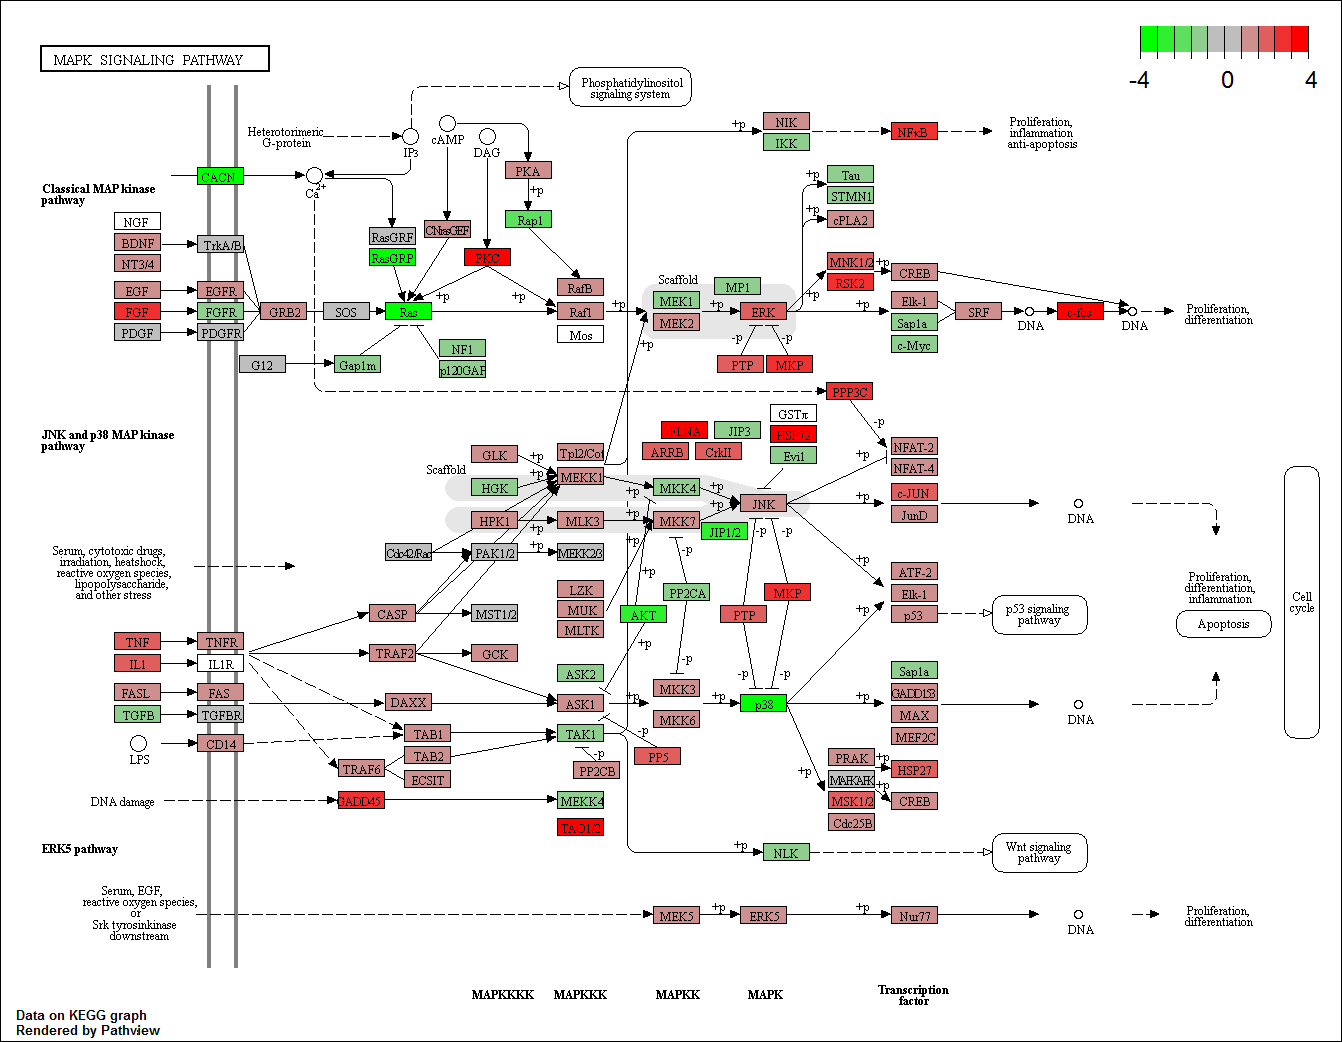

In [7]:
##-- KEGG pathwayview written into local files. Display the plot in R
display_png(file='notebook_ext/ipynb_data/assets/hsa04010.gene_all.pathview.png')

***

## 3. Practice how to associate gene expression with clincial data<a class="anchor" id="05"></a> <small>[[top](#top)]</small>  

* TCGA hosted on GDC (https://gdc-portal.nci.nih.gov)
<img src='notebook_ext/ipynb_data/assets/Figure19.png', title = 'GDC website', width = 800, height = 200>
* **Our data**
    * ~500 Ovarian Cancer patients (expression and clinical)
<img src='notebook_ext/ipynb_data/assets/Figure18.png', title = 'TCGA OV Nature paper', width = 800, height = 200>

### Workflow 

The analysis takes 3 major steps. For a more detailed description, refer to the extended version of notebooks (notebook_ext/04.Run_RNAseq.tutorial.ipynb).

<img src='notebook_ext/ipynb_data/assets/Figure26.png', title = 'TCGA & Clinical workflow', width = 900, height = 900>

***
### 3.1 - 3.2. Import data, normalize expression and cluster patients based on expression profile<a class="anchor" id="05.2"></a> <small>[[top](#top)]</small>

* Select 150 most variable genes for sample clustering
    * Without patient groups known, using all genes for sample clustering is computational intensive and may mask the true differences between potential sample groups
    * The most variable genes likely capture the majority of the sample variation

[1] "Cancer = OV"
[1] "Expression file = TCGA_OV.mirna_expression.tsv"
[1] "Clinical file  = TCGA_OV.clinical.tsv"
[1] "Patients with clincial = 487"
[1] "Patients with expression = 594"
[1] "Overlap = 486"
[1] "========================================"
[1] "Show the first three rows of clinical file:"
        sample vital.status overall.survival.month age.at.diagnosis.year
1 TCGA.61.1895       LIVING                   1.54                 52.21
2 TCGA.13.1510       LIVING                   2.56                 62.21
3 TCGA.23.1809       LIVING                   0.52                 63.32
  tumor.stage tumor.grade
1        IIIB          G3
2        IIIC          G3
3         IIC          G3
[1] "========================================"
[1] "Show the first three rows and left five columns of expression file:"
        gene TCGA.01.0628 TCGA.01.0630 TCGA.01.0631 TCGA.01.0633
1 DARKCORNER     4.858349     4.803304     4.590440     4.880881
2    DMR_285     9.768374     6.771561     5.1808

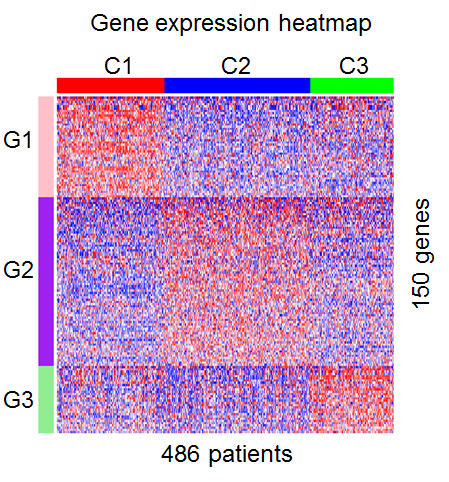

In [8]:
##-- Clean up environment
rm(list=ls())
set.seed(13)

##-- Load libraries required in this analysis
##-- Those packages were pre-installed in the AWS machine
pkg.list = c('ggplot2', 'RColorBrewer', 'reshape', 'broom',
             'gplots', 'survival', 'NMF', 'IRdisplay')
for(pkg in pkg.list) {
    suppressMessages(library(pkg, character.only = TRUE))
}

##-- Parameters
cancer = 'OV' 
gene.top.count = 150

##-- Import data
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'TCGA_OV.import_data.R')
source(script)

##-- run NMF to cluster samples & genes 
##-- (use 4 core 'p4', and print more info 'v')
##-- takes 5 minutes to run... skip in workshop
print('NMF clustering start...')
# expr.sub.nmf = nmf(expr.sub, 
#                    rank = 3, 
#                    method = 'brunet', 
#                    seed = 'random', 
#                    nrun = 100, 
#                    .opt = 'vp4') 
##-- workshop only: load already generated result
load(paste0(out.dir,'/',expr.file,'.nmf.RData'))
expr.sub.nmf = expr.sub.nmf
print('Done!')

##-- plot expression heatmap
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'TCGA_OV.plot_heatmap.R')
source(script)

***
### 3.2 Survival analysis<a class="anchor" id="05.2"></a> <small>[[top](#top)]</small>

Involves two sub-steps in [R](https://www.r-project.org/about.html) (i to ii).

* Identify overall survival (OS) difference between the three tumor subtypes / patient groups
* Kaplan–Meier (KM) plot, log-rank test, and cox proportional hazards model (univariate and multivariate)

### i. KM plot and log-rank test


DECEASED   LIVING 
     267      214 

[1] "========================================"

[1] "Running log-rank test for survival"


Call:
survdiff(formula = surv ~ clinical$cluster)

n=479, 7 observations deleted due to missingness.

                     N Observed Expected (O-E)^2/E (O-E)^2/V
clinical$cluster=1 152       92     80.5      1.65      2.37
clinical$cluster=2 209      104    130.0      5.22     10.26
clinical$cluster=3 118       71     56.5      3.74      4.79

 Chisq= 10.7  on 2 degrees of freedom, p= 0.00472 

[1] "========================================"

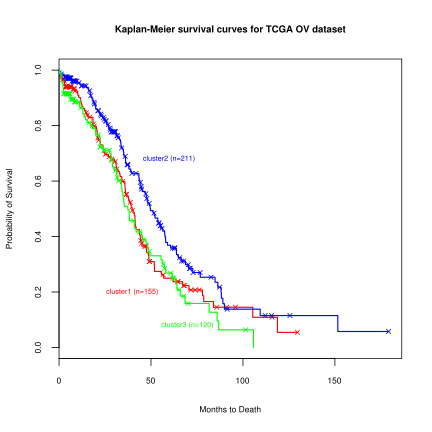

In [9]:
##-- add right censoring
table(clinical$vital.status)
clinical$censor = NA
clinical$censor[which(clinical$vital.status == 'LIVING')] = 0
clinical$censor[which(clinical$vital.status == 'DECEASED')] = 1
clinical$censor = as.numeric(clinical$censor)

##-- KM plot 
surv = Surv(clinical$overall.survival.month, clinical$censor)
surv.fit = survfit(surv ~ clinical$cluster)
script = file.path('notebook_ext','ipynb_data','Rscripts',
                   'TCGA_OV.plot_KM.R')
source(script)

separator

##-- log-rank test
print(paste0('Running log-rank test for survival'))
surv = Surv(clinical$overall.survival.month, clinical$censor)
surv.diff = survdiff(surv ~ clinical$cluster)
surv.diff

separator

***
### ii. Cox multi- and univariant model
* Comparison between cluster 1, 2 and/or 3 can be conducted
* For demo purpose, we will **compare cluster 1, 2 and 3 together**

In [10]:
##-- cox pp haz model (comparing cluster 2 and 3 as an example!)
print(paste0('Running Cox proportional hazards model for survival'))
clinical.sub = clinical[clinical$cluster %in% c(1,2,3),]
surv = Surv(clinical.sub$overall.survival.month, clinical.sub$censor)

print('Cluster 1 will be set as baseline ... ')

separator

##-- univariate cox model 
print(paste0('(a) Univariate cox model for survival'))
m1 = coxph(surv~(clinical.sub$cluster))
tidy(m1)

separator

##-- full cox model
print(paste0('(b) Full multivariate cox model for survival'))
m2 = coxph(surv~(clinical.sub$cluster + 
                 clinical.sub$age.at.diagnosis.year + 
                 clinical.sub$tumor.grade))
tidy(m2)

separator

##-- reduced cox model
##-- Always use the simplest model with the least necessary amount of 
##-- covariates to minimize overfitting
print(paste0('(c) Reduced multivariate cox model for survival'))
m3 = coxph(surv~(clinical.sub$cluster + clinical.sub$age.at.diagnosis.year))
tidy(m3)

[1] "Running Cox proportional hazards model for survival"
[1] "Cluster 1 will be set as baseline ... "


[1] "========================================"

[1] "(a) Univariate cox model for survival"


term,estimate,std.error,statistic,p.value,conf.low,conf.high
clinical.sub$cluster2,-0.36050667,0.1436706,-2.5092591,0.01209847,-0.6420958,-0.07891754
clinical.sub$cluster3,0.09696364,0.1584555,0.6119297,0.54058429,-0.2136035,0.40753078


[1] "========================================"

[1] "(b) Full multivariate cox model for survival"


term,estimate,std.error,statistic,p.value,conf.low,conf.high
clinical.sub$cluster2,-0.26656450,0.1489566,-1.7895453,0.073527039,-0.55851398,0.02538498
clinical.sub$cluster3,0.14874825,0.1661670,0.8951731,0.370694540,-0.17693311,0.47442961
clinical.sub$age.at.diagnosis.year,0.01759313,0.0058704,2.9969223,0.002727203,0.00608736,0.02909890
clinical.sub$tumor.gradeG3,0.33542879,0.1881276,1.7829858,0.074588622,-0.03329449,0.70415207


[1] "========================================"

[1] "(c) Reduced multivariate cox model for survival"


term,estimate,std.error,statistic,p.value,conf.low,conf.high
clinical.sub$cluster2,-0.30042201,0.146440028,-2.0515020,0.040218083,-0.587439194,-0.01340483
clinical.sub$cluster3,0.06960774,0.161267208,0.4316298,0.666010484,-0.246470184,0.38568565
clinical.sub$age.at.diagnosis.year,0.01570142,0.005769083,2.7216491,0.006495708,0.004394224,0.02700861


***
## Hands-on practice END

In [11]:
print('Program finished!')
sessionInfo()

[1] "Program finished!"


R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.5 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] NMF_0.20.6                 cluster_2.0.5             
 [3] rngtools_1.2.4             pkgmaker_0.22             
 [5] registry_0.3               survival_2.39-5           
 [7] gplots_3.0.1               IRdisplay_0.4.9000        
 [9] pathview_1.12.0            org.Hs.eg.db_3.3.0        
[11] AnnotationDbi_1.34.4       clusterProfiler_3.0.5     
[13] DOSE_2.10.7                

***

## Summary<a class="anchor" id="06"></a> <small>[[top](#top)]</small>

In this workshop, we demonstrated how to run RNAseq analysis to identify DEGs & pathways, and how to use expression data to identify patient groups with different clincial outcomes. We introduced the commonly used bioinformatics tools and good-practice approaches. All the analysis were performed on a pre-built machine in AWS EC2 cloud. 

All the class materials will stay open on [GitHub](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq) if you want to practice or use the pipelines and scripts for your own research projects.

Questions? Post on Github or contact Riyue (Sunny) at `rbao AT bsd dot uchicago dot edu`.

<img src='notebook_ext/ipynb_data/assets/Figure21.png', title = 'RNAseq summary', width = 600, height = 600>

***

## Run pipeline (after the workshop)<a class="anchor" id="07"></a> <small>[[top](#top)]</small>

### 1. Open terminal from Jupyter Notebook

Go to your Jupyter Notebook homepage. Click [New] button at top right corner of the homepage. In the dropdown menu, click [Terminal]. 

### 2. Get familiar with the file structure

All workshop materials are openly accessible via [GitHub](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq). Documentation and tutorials of the pipelines can be found in [README](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq) and [wiki](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq/wiki).

* **Run_RNAseq.tutorial.ipynb**: The main lecture / hands-on notebook (covered in workshop)
* **pipeline** directory: the automated, scalable and modularized pipeline 
    * From raw sequencing reads to quantified transcript abundance through one click
    * [`BigDataScript`](https://pcingola.github.io/BigDataScript/) & `Perl`
* **notebook_ext** directory: Extended notebooks 01-04 (not covered in workshop)
    * lecture notes
    * R codes and comments 

`##-- commands`   
`pwd`   
`cd ~/dev/rnaseq/CRI-Workshop-Nov2016-RNAseq`   
`ll pipeline`   
`ll notebook_ext`   

### 2. Launch pipeline (takes ~ 5 minutes)

`##-- commands `   
`pwd`   
`cd ~/dev/rnaseq/CRI-Workshop-Nov2016-RNAseq/pipeline`   
`ll`   
`cd test`   
`./Build_RNAseq.DLBC.sh &`   
`##-- START Thu Oct 27 15:57:38 UTC 2016  Running ../Build_RNAseq.pl`   
`##-- START Thu Oct 27 15:57:38 UTC 2016  Running Submit_RNAseq.DLBC.sh`   
`##-- running ... 3 ~ 4 minutes`   
`##-- END Thu Oct 27 16:01:25 UTC 2016`   
`ll`   

***

## Next Session: ChIPseq analysis and Integration of RNAseq & ChIPseq (Kyle Hernandez PhD)

***

## References
[1] Fog. et al. 2015. [Loss of PRDM11 promotes MYC-driven lymphomagenesis](http://www.bloodjournal.org/content/125/8/1272.long?sso-checked=true). Blood 125(8):1272-81   
[2] The Cancer Genome Atlas Research Network. 2011. [Integrated genomic analyses of ovarian carcinoma](http://www.nature.com/nature/journal/v474/n7353/full/nature10166.html). Nature 474, 609–615)   
[3] Sims et al. 2014. [Sequencing depth and coverage: key considerations in genomic analyses](http://www.nature.com/nrg/journal/v15/n2/abs/nrg3642.html). Nature Reviews Genetics 15, 121–132
